In [22]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def avaliar_modelo(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Normal', 'Fraude'],
        yticklabels=['Normal', 'Fraude']
    )
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()
    print(pd.DataFrame(report))

In [2]:
df = pd.read_csv('creditcard.csv')
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [5]:
model = LGBMClassifier(class_weight='balanced')
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 369, number of negative: 213236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced')

0.9973212618754134


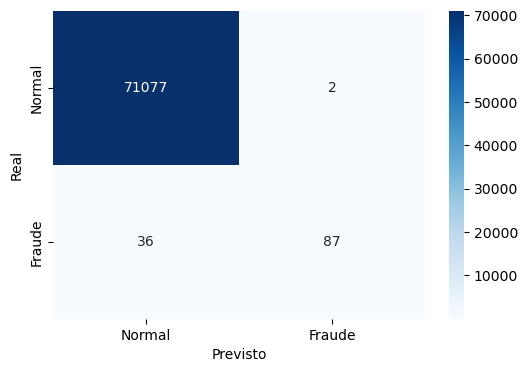

                      0           1  accuracy     macro avg  weighted avg
precision      0.999494    0.977528  0.999466      0.988511      0.999456
recall         0.999972    0.707317  0.999466      0.853644      0.999466
f1-score       0.999733    0.820755  0.999466      0.910244      0.999424
support    71079.000000  123.000000  0.999466  71202.000000  71202.000000
None


In [25]:
y_probs = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

## Eu to tentando achar o melhor entre recall e precision
f1 = 2 * (precision * recall)/(precision + recall)
best_idx = f1.argmax()
best_threshold = thresholds[best_idx]

# O limiar de decisão foi escolhido com base no ponto de maior F1-score na curva Precision–Recall, 
# equilibrando precisão e recall para a classe fraude.
y_pred = (y_probs >= best_threshold).astype(int)

print(best_threshold)
print(avaliar_modelo(y_test, y_pred))

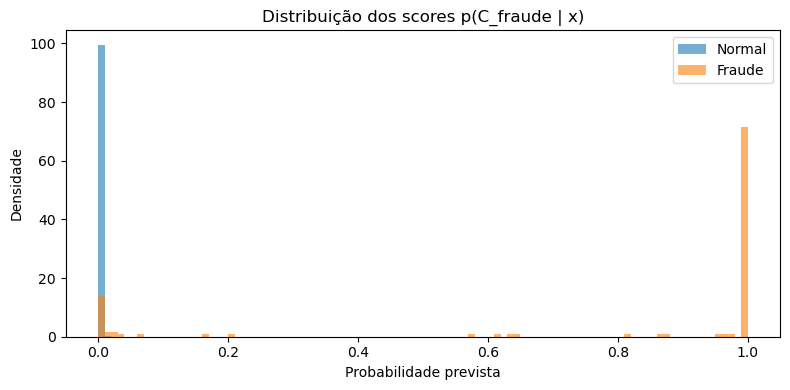

In [16]:
# Visualização dos estados
plt.figure(figsize=(8, 4))
plt.hist(y_probs[y_test == 0], bins=100, alpha=0.6, label='Normal', density=True)
plt.hist(y_probs[y_test == 1], bins=100, alpha=0.6, label='Fraude', density=True)
plt.title("Distribuição dos scores p(C_fraude | x)")
plt.xlabel("Probabilidade prevista")
plt.ylabel("Densidade")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
## Calculo da auc

auc_pr = auc(recall, precision)
print(f'AUC-PR: {auc_pr:.4f}')

AUC-PR: 0.8150
